# Understanding rates of change (변화에 대하여)

변화는 '__시간의 차이__'에서 비롯되며, <br/>
순간은 그저 '__한 순간__'일 뿐이다.

즉, "순간의 변화" 라는 표현은 모순된 표현이 연결된 역설적인 문장이다. <br/>
* 순간(instantaneous): 어느 특정 한 점 ( at, ● ) 
* 변화(change): 두 시점 사이에서 발생하는 차이 ( between, | | )

<br/>

※ '모순'과 '역설'은 다르다 
- 모순: 말 자체가 안 되는 것 (e.g., 무엇이는 막는 방패와 무엇이든 뚫는 창)
- 역설: 모순 처럼 보이지만 그 안에 숨은 진리가 있는 것 (e.g., 작은 거인)

<br/>

결국, 미분에서 말하는 순간(instantaneous) := 아주 짧은 시간 간극 

<br/>

instantaneous : 순간의 (=동시에 일어나는) 
* instant에서 온 건가?


two of the most important concepts from calculus:
* the derivative and the integral
* the derivative takes a function and gives you another function measuring its rate of change
* the integral does the opposite; it takes a function representing __a rate of change__ and gives you back a function measuring the original, __cumulative value__

<br/>



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)    # value sequence 생성 ; 
                                        # (ref) https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

    if tlabel:
        plt.xlabel(tlabel,fontsize=18)  # x-축 레이블 설정 ; 
                                        # (ref) https://codetorial.net/matplotlib/set_label.html
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)

    plt.plot(ts, [f(t) for t in ts], **kwargs)  # 기본 그래프 및 스타일 옵션 추가 ; 
                                                # (ref) https://wikidocs.net/92071

    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [11]:
"""  to plot volume or flow rate vs. time with correct labels.
"""
def plot_volume(func,tmin,tmax,axes=False,**kwargs):
    plot_function(func, tmin, tmax, tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(func,tmin,tmax,axes=False,**kwargs):
    plot_function(func,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

## 1. Calculating average flow rates from volumes

In [8]:
""" These are the actual volume and flow rate functions, 
    used throughout the chapter. You can ignore the formulas that define them.
    (refer to page 338)
"""
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

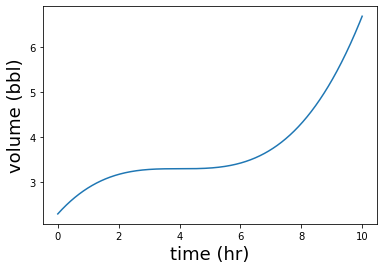

In [9]:
plot_volume(volume, 0, 10) # A plot of the volume function shows the volume of oil in the tank over time.

### 1.1 Implementing an ```average_flow_rate``` function - (평균 변화율)
The way to calculate the 'average flow rate' is to take the total change in volume divided by the elapsed time:

\begin{equation}


\textrm{average flow rate} = \frac{\textrm{change in volum}}{\textrm{elapsed time}} 
                            
\end{equation}


 

This is how we calculate rates of change in different contexts:

\begin{equation}


\textrm{average flow rate from }t_1 \textrm{ to } t_2 = \frac{V(t_2)-V(t1)}{t_2 - t_1}
                            
\end{equation}

In [6]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)    # 경과 시간에 대한 볼륨의 변화 
                                        # t1 := starting time 
                                        # t2 := ending time 

In [10]:
volume(4)  # 탱크의 볼륨 @ 4-hr 

3.3

In [11]:
volume(9)  # 탱크의 볼륨 @ 9-hr 

5.253125

In [12]:
average_flow_rate(volume, 4, 9)     # 4-hr -> 9-hr 로 시간의 변화에 따른 볼륨의 평균 변화율 
                                    # the average flow rate into the tank between 
                                    # the 4-hr mark and the 9-hr mark

0.390625

In [12]:
(5.253125 - 3.3) / ( 9 - 4)   # 계산 확인 

0.390625

### 1.2 Picturing the average flow rate with a secant line
* check the page 307 in the book.
* Exercises 참고 

### 1.3 Negative rates of change

In [17]:

def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

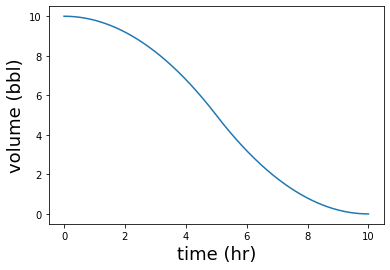

In [19]:
plot_volume(decreasing_volume, 0, 10)   # plot_volume(decreasing_volume,0,10)

In [21]:
average_flow_rate(decreasing_volume, 0, 4)   # 0-hr -> 4-hr 로 시간의 변화에 따른 볼륨의 평균 변화율 
                                           # the average flow rate into the tank between 
                                           # the 0-hr mark and the 4-hr mark

-0.8

### 1.4 Exercises

**Exercise:** Suppose you start a road-trip at noon, when your odometer reads 77,641 miles and you end your road-trip at 4:30 in the afternoon with your odometer reading 77,905 miles.  What was your average speed during the trip?

(77905 - 77641) / 4.5

**Exercise:** Write a Python function `secant_line(f,x1,x2)` that takes a function `f(x)` and two `x` values `x1` and `x2` and returns a new function representing a secant line over time.  For instance, if you ran `line = secant_line(f,x1,x2)` then `line(3)` would give you the $y$-value of the secant line at $x=3$.

In [22]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

**Exercise:** Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points.

In [23]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

Example: secant line from t=4 to t=8 on our volume graph

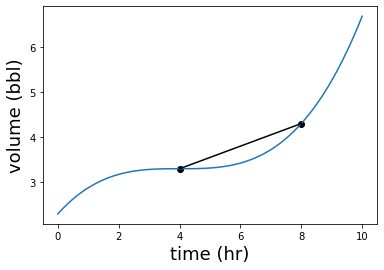

In [24]:
plot_volume(volume,0,10)
plot_secant(volume,4,8)

***

## 2. Plotting the average flow rate over time

### 2.1 Finding the average flow rate(평균 변화율) in different time intervals
we need to find the starting points for each time interval. <br/>
This means finding __a list of time values__ from the starting time $t1$ to the ending time $t2$ in increments of the interval length $dt$.

In [26]:
import numpy as np

np.arange(0, 10, 0.5)   # starting from time zero and 
                        # going to time 10 in 0.5-hr increments gives us the following interval start times

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

For every interval start time $t$, <br/>
finds the average flow rate from $t$ to $t+dt$. (We want the list of pairs of $t$ with the corresponding rate.)

In [29]:
def interval_flow_rates(v, t1, t2, dt):
    t_Afr = [ (t, average_flow_rate(v, t, t+dt) ) for t in np.arange(t1, t2, dt)]
    return t_Afr 

In [28]:
interval_flow_rates(volume, 0, 10, 1)   # with 0 hrs and 10 hrs as the start and end times, 
                                        # and 1 hr as the interval length,

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

### 2.2 Plotting the interval flow rates alongside the flow rate function

In [30]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)

    times = [t for (t,_) in series]
    rates = [q for (_,q) in series] # interval flow rates 

    plt.scatter(times, rates)

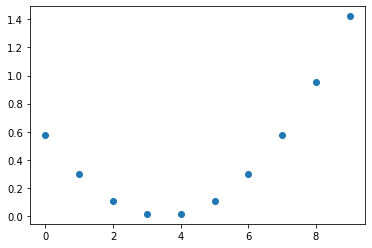

In [32]:
plot_interval_flow_rates(volume, 0, 10, 1)  # dt=1 일때, 1시간 간극으로 변하는 기울기의 평균 변화율 그래프 
                                            # A plot of the average flow rate in each hour

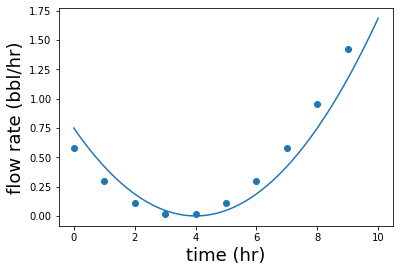

In [36]:
plot_flow_rate(flow_rate, 0, 10)    # the actual flow rate (= smooth curve)
                                    # 우에서 미분 도함수로 구한 실제 변화                                    

plot_interval_flow_rates(volume, 0, 10, 1) # 데이터로 부터 수치 해석적으로 구한 변화 (= dots)

Average flow rate on 20 minute (1/3 hour) intervals, compared to actual `flow_rate` function
* dt = 1   -> dt = 1/3 으로 줄임 
* time intervals 을 줄여서 실험

The average flow rates are still not a perfect match to the instantaneous flow rates, <br/> 
but they’re a lot closer!

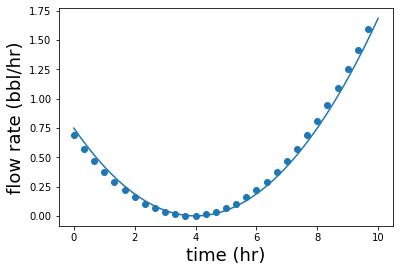

In [40]:
plot_flow_rate(flow_rate, 0, 10)

plot_interval_flow_rates(volume, 0, 10, 1/3) # The graph of the flow rate over time 
                                             # compared with the average flow rates at 20-min intervals

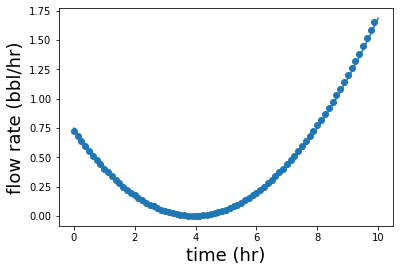

In [45]:
plot_flow_rate(flow_rate, 0, 10)

plot_interval_flow_rates(volume, 0, 10, 1/8)

### 2.3 Exercises

Exercise: Plot the decreasing_volume flow rates over time on 0.5 hour intervals. 
* When is it’s flow rate the lowest? 
* That is, when is oil leaving the tank at the fastest rate?

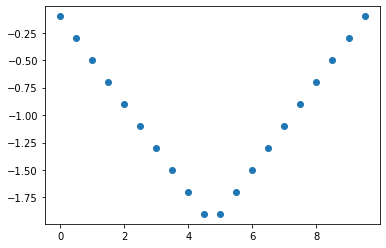

In [48]:
plot_interval_flow_rates(decreasing_volume, 0, 10, 0.5) # dt=0.5

Exercise: Write a linear volume function and plot the flow rate over time to show that it is constant.

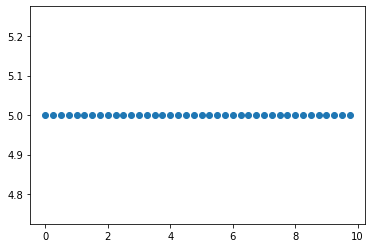

In [49]:
def linear_volume_function(t):
    return 5*t + 3

plot_interval_flow_rates(linear_volume_function,0, 10, 0.25) # dt= 0.25

***

## 3. Plotting the average flow rate over time

### 3.1 Finding the slope of very small secant lines - (중앙 차분)
These calculations result in numbers converging (getting closer and closer) to a value of `0.421875`

In [50]:
average_flow_rate(volume, 0.5, 1.5)  # Two secant lines around t = 1 hr have similar slopes

0.42578125

In [51]:
average_flow_rate(volume, 0.9, 1.1)  # The volume graph looks nearly straight at a smaller interval around t = 1 hr.

0.4220312499999988

In [52]:
average_flow_rate(volume, 0.99, 1.01)  # Zooming in even closer, the volume graph is visually indistinguishable from a straight line.

0.42187656249998945

Compare to actual value from flow rate function

In [53]:
flow_rate(1)

0.421875

### 3.2 Building the instantaneous flow rate function - (순간 변화율)

In [56]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits) #<1>
    h = 1
    approx = average_flow_rate(v,t-h,t+h) #<2>

    for i in range(0,2*digits): #<3>
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h) #<4>

        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits) #<5>
        else:
            approx = next_approx #<6>
            
    raise Exception("Derivative did not converge") #<7>

In [55]:
instantaneous_flow_rate(volume,1)

0.421875

### 3.3 Currying and plotting the instantaneous flow rate function

In [57]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume,t)
    return flow_rate_function

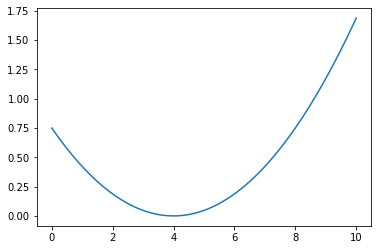

In [62]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

### 3.4 Exercises

**Exercise:** Confirm that the graph of the `volume` function is not a straight line on the interval from 0.999 hours to 1.001 hours.

In [63]:
volume(1)

2.878125

In [64]:
secant_line(volume,0.999,1.001)(1)

2.8781248593749997

**Exercise:** Approximate the slope of a tangent line to the `volume` graph at $t=8$ by computing the slopes of smaller and smaller secant lines around $t=8$.

In [65]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [66]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [67]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [68]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

**Exercise:** For the sign function defined in Python below, convince yourself that it doesn’t have a derivative at $x=0$.

In [69]:
def sign(x):
    return x / abs(x)

In [70]:
average_flow_rate(sign, -0.1, 0.1)

10.0

In [71]:
average_flow_rate(sign, -0.01, 0.01)

100.0

In [72]:
average_flow_rate(sign, -0.001, 0.001)

1000.0

In [73]:
average_flow_rate(sign, -0.000001, 0.000001)

1000000.0

***

## 4. Approximating the change in volume